,bucket,cpu,gcl,population,gcl delta,cpu normal
count,11986.000000,11986.000000,1.198600e+04,11986.000000,11985.000000,11506.000000
mean,9934.695979,11.059925,7.106798e+06,7.891874,4.734168,4.268000
std,164.414081,33.435178,1.582742e+04,0.322416,3.981108,2.550719
min,9495.000000,1.698583,7.081380e+06,6.000000,0.000000,1.698583
25%,9866.000000,3.198289,7.091765e+06,8.000000,2.000000,3.183843
50%,10000.000000,3.543735,7.105865e+06,8.000000,4.000000,3.516967
75%,10000.000000,4.545228,7.119056e+06,8.000000,7.000000,4.182345
max,11000.000000,229.978184,7.138119e+06,8.000000,26.000000,45.931096


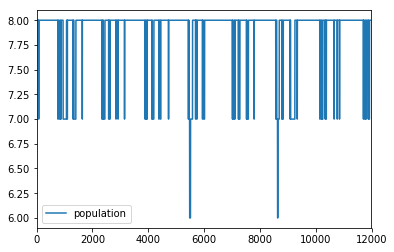

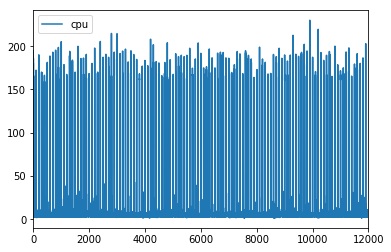

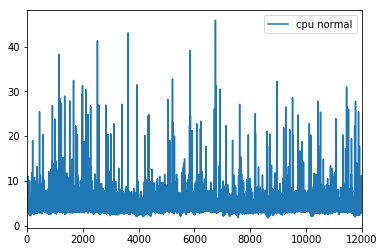

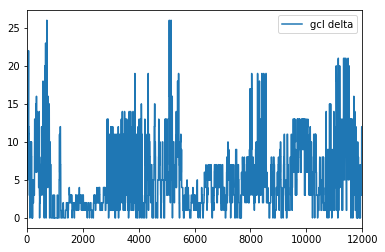

In [21]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 1

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu normal'] = df[df['cpu'] < 80]["cpu"]

df.plot(y="population")
df.plot(y="cpu")
df.plot(y="cpu normal")
df.plot(y="gcl delta")
df.describe()